In [1]:

sales=pd.read_csv('C:\\documents\\study material\\data science\\supply chain\\Udemy - RA Data Science and Supply Chain analytics. A-Z with Python 2020-9\\7. Working with dates in Python\\12.1 twentyeleven.csv',parse_dates=True)

sales.head()

<IPython.core.display.Javascript object>

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [2]:
sales.describe()

,Invoice,Quantity,Price,Customer ID,revenue,year
count,484329.000000,484330.000000,484330.000000,367058.000000,484330.000000,484330.0
mean,561803.767295,10.525988,3.840852,15271.566801,19.769626,2011.0
std,12304.347788,43.003959,31.532260,1710.331691,91.136800,0.0
min,539993.000000,1.000000,0.000000,12347.000000,0.000000,2011.0
25%,550989.000000,1.000000,1.250000,13924.000000,3.900000,2011.0
50%,562540.000000,4.000000,2.080000,15116.000000,9.950000,2011.0
75%,572650.000000,12.000000,4.130000,16771.000000,17.700000,2011.0
max,581587.000000,12540.000000,11062.060000,18287.000000,38970.000000,2011.0


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [2]:
sales['InvoiceDate']=pd.to_datetime(sales['InvoiceDate'])
sales['date']=pd.to_datetime(sales['date'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      484329 non-null  float64            
 1   StockCode    484330 non-null  object             
 2   Description  484330 non-null  object             
 3   Quantity     484330 non-null  int64              
 4   InvoiceDate  484330 non-null  datetime64[ns, UTC]
 5   Price        484330 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      484330 non-null  object             
 8   date         484330 non-null  datetime64[ns]     
 9   revenue      484330 non-null  float64            
 10  year         484330 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 40.6+ MB


In [3]:
sales=sales.drop_duplicates()

In [4]:
sales=sales.drop('Customer ID',axis=1)

In [5]:
sales=sales.dropna()

In [6]:
sales['Revenue']=sales['Quantity']*sales['Price']

In [7]:
des_grouped=sales.groupby(['Description']).agg(total_sales=('Quantity',np.sum),
                                              total_revenue=('Revenue',np.sum)).reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
des_grouped.head()

,Description,total_sales,total_revenue
0,10 COLOUR SPACEBOY PEN,5981,5060.18
1,12 COLOURED PARTY BALLOONS,2072,1357.58
2,12 DAISY PEGS IN WOOD BOX,332,569.40
3,12 EGG HOUSE PAINTED WOOD,138,2123.61
4,12 HANGING EGGS HAND PAINTED,40,83.20


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='total_sales', ylabel='total_revenue'>

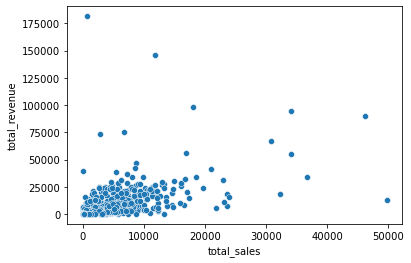

In [28]:
sns.scatterplot(data=des_grouped,x='total_sales',y='total_revenue')

In [8]:
date_grouped=sales.groupby(['date']).agg(total_sales=('Quantity',np.sum),
                                              total_revenue=('Revenue',np.sum))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

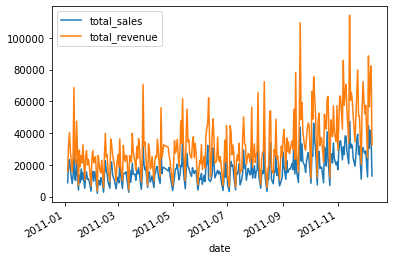

In [41]:
plt.figure(figsize=(20,20))
date_grouped.plot();

In [38]:
date_grouped.head()

,total_sales,total_revenue
date,,
2011-01-04,8630,16005.73
2011-01-05,19769,32630.27
2011-01-06,23174,40366.45
2011-01-07,17160,28836.59
2011-01-09,8125,15590.68


In [9]:
import inventorize as inv

In [10]:
segregated=inv.ABC(des_grouped[['Description','total_sales']])

In [11]:
segregated

,Description,total_sales,Percentage,comulative,Category
3837,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49756,9.759808e-03,0.009760,A
1758,JUMBO BAG RED RETROSPOT,46223,9.066798e-03,0.018827,A
2603,POPCORN HOLDER,36749,7.208441e-03,0.026035,A
3747,WHITE HANGING HEART T-LIGHT HOLDER,34005,6.670196e-03,0.032705,A
214,ASSORTED COLOUR BIRD ORNAMENT,33999,6.669019e-03,0.039374,A
...,...,...,...,...,...
1849,LARGE TAHITI BEACH BAG,1,1.961534e-07,0.999999,C
3762,WHITE SILVER NECKLACE SHELL GLASS,1,1.961534e-07,0.999999,C
279,BAROQUE BUTTERFLY EARRINGS RED,1,1.961534e-07,1.000000,C
277,BAROQUE BUTTERFLY EARRINGS MONTANA,1,1.961534e-07,1.000000,C


In [12]:
segregated.Category.value_counts()

C    2150
A     917
B     892
Name: Category, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Category', ylabel='count'>

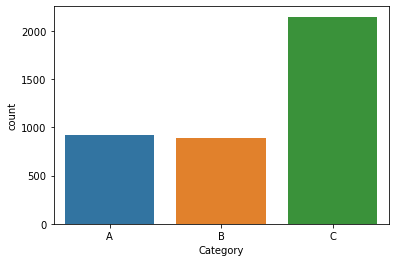

In [13]:
sns.countplot(x='Category',data=segregated)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Category', ylabel='total_sales'>

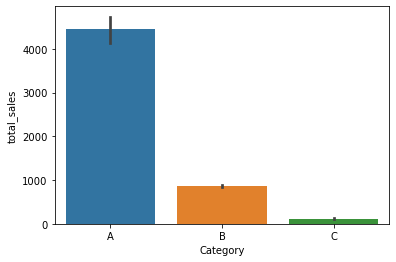

In [14]:
sns.barplot(x='Category',y='total_sales',data=segregated)

In [15]:
# for multi segment ABC analysis

In [17]:
multi_segregated=inv.productmix(des_grouped['Description'],des_grouped['total_sales'],des_grouped['total_revenue'])

In [18]:
multi_segregated.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
1027,DOTCOM POSTAGE,654,181577.58,0.000128,0.920750,0.018986,0.018986,B,A,B_A
2772,REGENCY CAKESTAND 3 TIER,11775,146461.78,0.002310,0.189124,0.015314,0.034300,A,A,A_A
2348,PARTY BUNTING,18050,98237.49,0.003541,0.094163,0.010272,0.044571,A,A,A_A
3747,WHITE HANGING HEART T-LIGHT HOLDER,34005,95002.50,0.006670,0.032705,0.009933,0.054505,A,A,A_A
1758,JUMBO BAG RED RETROSPOT,46223,90140.66,0.009067,0.018827,0.009425,0.063930,A,A,A_A


In [19]:
multi_segregated['product_mix'].value_counts()

C_C    1814
A_A     572
B_B     404
A_B     290
C_B     284
B_C     283
B_A     205
A_C      55
C_A      52
Name: product_mix, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='product_mix', ylabel='count'>

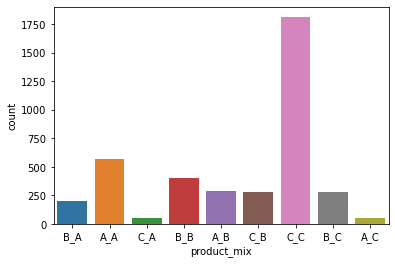

In [20]:
sns.countplot(data=multi_segregated,x='product_mix')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

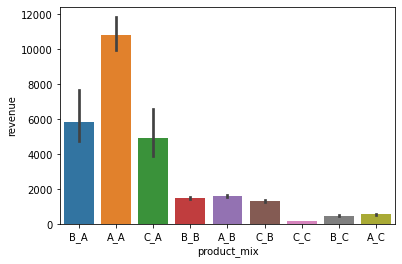

In [21]:
# revenue
sns.barplot(data=multi_segregated,x='product_mix',y='revenue')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='product_mix', ylabel='sales'>

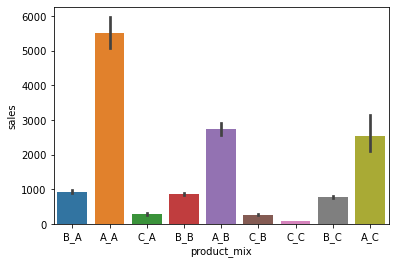

In [22]:

# sales
sns.barplot(data=multi_segregated,x='product_mix',y='sales')

In [ ]:
# store level ABC analysis

In [26]:
country_grouped=sales.groupby(['Country','Description']).agg(total_sales=('Quantity',np.sum),
                                              total_revenue=('Revenue',np.sum)).reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
mix_segregated=inv.productmix_storelevel(country_grouped['Description'],country_grouped['total_sales'],country_grouped['total_revenue'],country_grouped['Country'])

C:\Users\njjanaki\Anaconda3\lib\site-packages\inventorize\__init__.py:1108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])


In [31]:
mix_segregated.columns

Index(['sku', 'sales', 'revenue', 'storeofsku', 'sales_mix',
       'comulative_sales', 'revenue_mix', 'comulative_revenue',
       'sales_category', 'revenue_category', 'product_mix'],
      dtype='object')

In [32]:
mix_segregated.head()

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
369,RABBIT NIGHT LIGHT,1884,3375.84,Australia,0.022498,0.057749,0.024554,0.024554,A,A,A_A
488,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00,Australia,0.007165,0.170619,0.015143,0.039697,A,A,A_A
401,RED TOADSTOOL LED NIGHT LIGHT,1344,1987.20,Australia,0.016049,0.094146,0.014454,0.054150,A,A,A_A
464,SET OF 3 CAKE TINS PANTRY DESIGN,464,1983.20,Australia,0.005541,0.221657,0.014424,0.068575,A,A,A_A
403,REGENCY CAKESTAND 3 TIER,180,1978.20,Australia,0.002149,0.684734,0.014388,0.082963,A,A,A_A


In [44]:
product_store=mix_segregated.groupby(['storeofsku','product_mix']).count().reset_index()

In [45]:
product_store

,storeofsku,product_mix,sku,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category
0,Australia,A_A,149,149,149,149,149,149,149,149,149
1,Australia,A_B,63,63,63,63,63,63,63,63,63
2,Australia,A_C,20,20,20,20,20,20,20,20,20
3,Australia,B_A,58,58,58,58,58,58,58,58,58
4,Australia,B_B,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...
315,Unspecified,B_B,27,27,27,27,27,27,27,27,27
316,Unspecified,B_C,9,9,9,9,9,9,9,9,9
317,Unspecified,C_A,16,16,16,16,16,16,16,16,16
318,Unspecified,C_B,17,17,17,17,17,17,17,17,17


In [47]:
product_store[product_store['storeofsku']=='Australia'][['storeofsku','product_mix']]

,storeofsku,product_mix
0,Australia,A_A
1,Australia,A_B
2,Australia,A_C
3,Australia,B_A
4,Australia,B_B
5,Australia,B_C
6,Australia,C_A
7,Australia,C_B
8,Australia,C_C


In [52]:
product_store['product_mix'].value_counts()

A_A    37
B_A    37
C_C    36
A_B    36
A_C    36
C_B    35
C_A    35
B_B    35
B_C    33
Name: product_mix, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

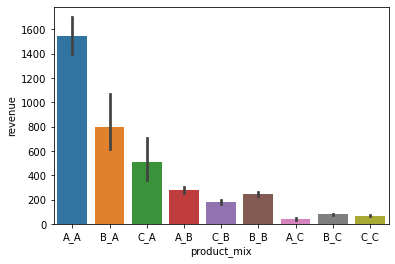

In [53]:
sns.barplot(data=mix_segregated,x='product_mix',y='revenue')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

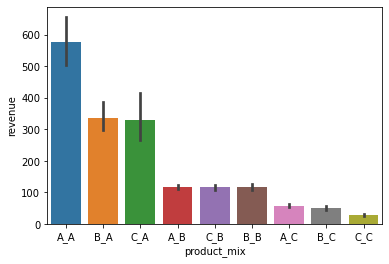

In [54]:
sns.barplot(data=mix_segregated[mix_segregated['storeofsku']=='Australia'],x='product_mix',y='revenue')

In [57]:
mix_segregated['storeofsku'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype=object)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

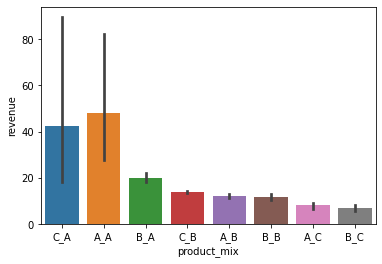

In [58]:
sns.barplot(data=mix_segregated[mix_segregated['storeofsku']=='Canada'],x='product_mix',y='revenue')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='product_mix', ylabel='sales'>

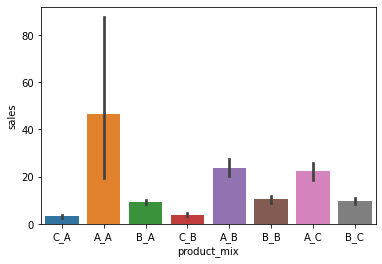

In [60]:
sns.barplot(data=mix_segregated[mix_segregated['storeofsku']=='Canada'],x='product_mix',y='sales')